In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
df = pd.read_csv("Fraud_check.csv")

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df.isnull().sum()

,0
Undergrad,0
Marital.Status,0
Taxable.Income,0
City.Population,0
Work.Experience,0
Urban,0


In [ ]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
# Select only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
display(numerical_df.corr())

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [ ]:
df.head()



,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df["Status"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Reload the original data
df = pd.read_csv("/content/Fraud_check.csv")

In [ ]:
# Create the 'Status' column
df["Status"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")

In [ ]:
# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df, columns=['Undergrad', 'Marital.Status', 'Urban', 'Status'], drop_first=True)

In [ ]:
# Drop the original 'Taxable.Income' column
df.drop("Taxable.Income", axis=1, inplace=True)

In [ ]:
# Define features (X) and target (y)
X = df.drop("Status_Risky", axis=1)
y = df["Status_Risky"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    min_samples_split=4,
    random_state=32
)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       random_state=32)

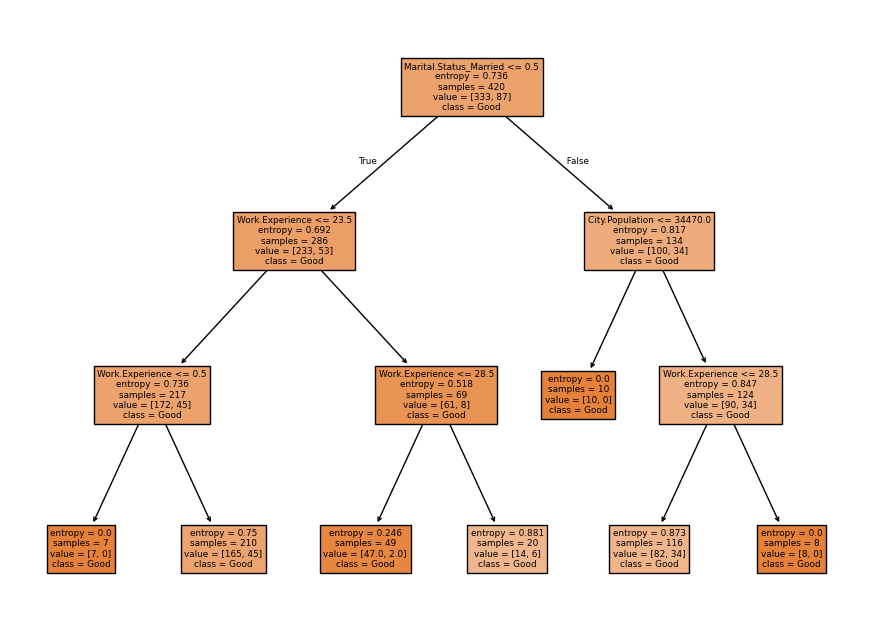

In [ ]:
plt.figure(figsize=(11,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Good", "Risky"])
plt.show()


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.7944444444444444
Confusion Matrix:
 [[143   0]
 [ 37   0]]


<Axes: >

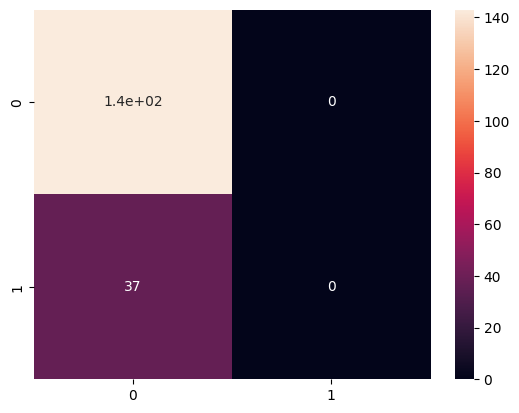

In [ ]:
import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)